<a href="https://colab.research.google.com/github/ismailfaruk/Arduino/blob/master/Copy_of_415FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# path for google drive
path = '/content/drive/My Drive/ECSE415/FinalProject/'
frame_path = '/content/drive/My Drive/ECSE415/FinalProject/frames/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# command for unzip the photos
!unzip '/content/drive/My Drive/ECSE415/FinalProject/frames.zip' -d '/content/drive/My Drive/ECSE415/FinalProject'

Archive:  /content/drive/My Drive/ECSE415/FinalProject/frames.zip
   creating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000001.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000002.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000003.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000004.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000005.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000006.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000007.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000008.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/frames/frames/seq_000009.jpg  
  inflating: /content/drive/My Drive/ECSE415/FinalProject/fr

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
# add the filenames to the array
files = os.listdir(frame_path) #img1077
frame_files = []

for i in range(100, 200):
    frame_files.append("seq_000" + str(i) +".jpg")

# read all the images to the array
images = []

for n in range(100):
    temp = cv2.imread(frame_path + frame_files[n])
    temp = np.array(temp)
    #temp = temp.flatten()
    images.append(temp)

images = np.array(images)
#images = images.transpose()
print(images.shape)

im = cv2.imread(frame_path + "seq_000110.jpg")
# cv2_imshow(im)
# cv2_imshow(images[0])

(100, 480, 640, 3)


In [ ]:
def load_images(image_path):
  files = os.listdir(frame_path) #img1077
  files_name = [file_name for file_name in files if file_name.endswith('.jpg')]
  files_name.sort()
  frames = []

  #read the first 100 images
  for i, file_name in enumerate(files_name):
    frame = cv2.imread(image_path + file_name)
    frames.append(frame)
    if(i == 99):
      break

  frames = np.array(frames)
  return frames

images = load_images(frame_path)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

outputs = predictor(images[10])
# outputs_2 = predictor(im)

tensor([ 0,  0,  0,  0,  0,  0,  0, 58,  0, 28,  0,  0, 16, 28,  0,  0,  0, 58,
         0,  1], device='cuda:0')
Boxes(tensor([[533.7879, 204.4229, 572.3319, 308.2179],
        [ 89.8060, 351.1075, 138.1664, 479.4709],
        [149.4675, 120.3887, 176.4807, 203.6333],
        [146.6103, 202.0874, 184.7099, 297.8233],
        [120.0224, 160.6140, 155.2285, 260.4264],
        [118.0371, 121.2540, 145.9686, 176.5364],
        [200.8636,  35.8868, 216.2659,  79.8728],
        [241.4211, 187.7358, 379.3744, 296.3509],
        [222.1404,  35.2061, 235.6470,  78.7980],
        [ 90.1112, 169.3728, 113.4426, 213.4951],
        [119.9442,  31.5177, 141.0500,  90.0298],
        [527.6094,  40.7835, 543.5579, 111.1303],
        [234.1685,  19.3605, 395.5361, 146.1228],
        [ 73.9093, 170.3191,  90.5564, 216.2206],
        [ 24.8958,  81.0784,  80.8525, 160.4871],
        [281.2662, 334.3687, 299.5364, 393.3381],
        [ 63.2336, 123.2996,  86.2389, 215.6680],
        [235.4111,  73.5848, 3

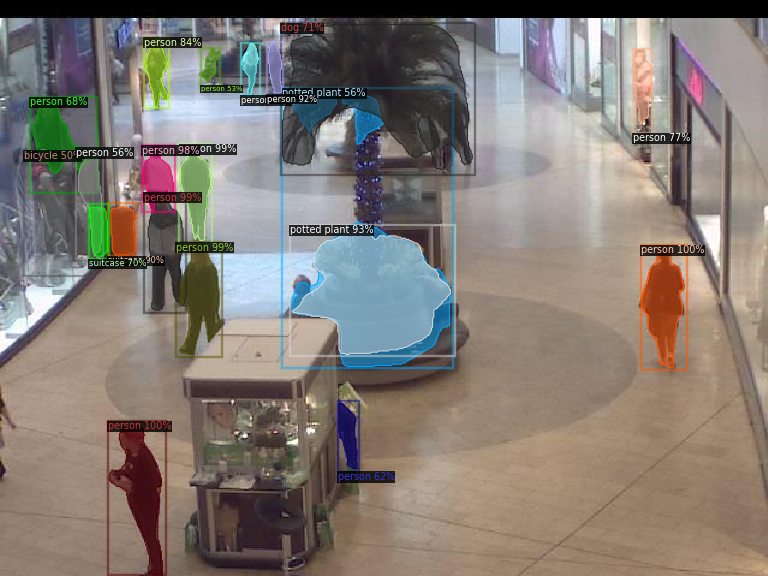

In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
# print(outputs_2["instances"].pred_classes)
# print(outputs_2["instances"].pred_boxes)

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(images[10][:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])
# out_2 = v.draw_instance_predictions(outputs_2["instances"].to("cpu"))
# cv2_imshow(out_2.get_image()[:, :, ::-1])